### Séries temporais são conjuntos de dados que seguem uma ordem (bem preenchida) de datas - seja quebrado por dia, mês ou ano.

### Componentes:

- ##### Tendência
- ##### Sazonalidade
- ##### Ciclo
- ##### Erro

|Componente|Explicação|
|:--:|:--:|
|Tendência|Padrão de Crescimento ou Queda|
|Sazonalidade|Padrão de comportamento em faixas de tempo (janelas menores)|
|Ciclos|São eventos de crescimento ou quedas cíclicas, não são efeitos de tendência ou sazonalidade mas se efeitos de fora|
|Erro|Aquilo que não pode ser explicado, que não faz parte nem de tendência, sazonalidade ou ciclo - a matemática não explica|

# Mais conceitos Gerais

## **Autocorrelação**

### Autocorrelação é a relação entre intervalos da variável na série temporal (a relação entre dois pontos no período)

A autocorrelação mede através de lags escolhidos, a relação sendo -1 forte negativa, 1 forte positiva e 0 sem autocorrelação

-1 - 0 - 1

Lags é a janela dessa autocorrelação. Por exemplo, se escolhemos 1 Lag queremos analisar a autocorrelação de hoje com ontem. Se 2, calculamos a auto correlação de hoje com os últimos dois dias

$$\rho_k = \frac{\sum_{t=k+1}^n (Y_t - \bar{Y}) (Y_{t-k} - \bar{Y})}{\sum_{t=1}^n (Y_t - \bar{Y})^2}$$

Onde:

- $\rho_k$ é a autocorrelação no lag $k$.
- $Y_t$ é o valor da série temporal no tempo $t$.
- $Y_{t-k}$ é o valor da série temporal defasado por $k$ períodos.
- $\bar{Y}$ é a média da série temporal.
- $n$ é o número total de observações na série temporal.


### Gráficos

Existem dois gráficos que demonstram de forma direta a autocorrelação:

- ACF
- PACF

Ambos os gráficos são desenhados de forma a que no eixo $y$ está a força da autocorrelação e no eixo $x$ os lags. Neles há uma linha tracejada que indica o nível de significância dessa autocorrelação, ou seja, caso o valor passe essa linha, temos então autocorrelação naquele lag. Lembrando que o gráfico está medindo a partir da última data da série com relação ao lag.

Esses gráficos são usados para ajudar na modelagem de séries temporais, por exemplo, na escolha dos parâmetros para modelos ARIMA. Eles fornecem insights sobre a estrutura de dependência temporal nos dados e ajudam a identificar se a série temporal é estacionária ou se precisa de diferenciação.

***Usamos o ACF quando queremos autocorrelação de lags acumulados. Por exemplo, no lag 4 do gráfico a autocorrelação é dada por hoje e do lag 2 + lag 3 + lag 4</br>***
***Já o PACF faz autocorrelação entre os pontos escolhidos, se escolho lag 4 a autocorrelação se dá por hoje e o 4 período anterior***

Séries sem autocorrelação, ou menos de 5% entre os intervalo damos o nome de Dados Aleatórios ou Ruído Branco


O teste para autocorrelação é o teste de Ljung-Box onde p_value > 0.05 não há autocorrelação    


## **Residuais e Métricas de Desempenho**

#### Para forecast é preciso entender ideias de residuos e valores ajustados

Quando fazemos uma previsão em dados de treino para treinar um modelo de Forecast, criamos uma reta que tenta se ajustar aos dados originais. Essa reta produz valores ajustados.
Resíduos, nesse caso, nada mais são que a diferença entre os valores reais e os valores ajustados, eles são a diferença ou o Erro da sua previsão para os dados reais.

As métricas de desempenho para avaliar qualidade do seu modelo de Forecasting se resume, como em Regressões, em MAE, RMSE E MAPE

- #### Residuais:
- 
$$e_t = Y_t - \hat{Y}_t$$


$e_t$ é o resíduo no tempo $t$.
$Y_t$ é o valor observado no tempo $t$.
$\hat{Y}_t$ é o valor previsto pelo modelo no tempo $t$.

</br>

- #### MAE:

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$

$Y_i$ é o valor real no tempo $i$;
$\hat{Y}_i$ é o valor previsto no tempo $i$;
$n$ é o número total de observações.

</br>

- #### RMSE:
 
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}$$


$Y_i$ é o valor real no tempo $i$;
$\hat{Y}_i$ é o valor previsto no tempo $i$;
$n$ é o número total de observações.
</br>

- #### MAPE:

$$\text{MAPE} = \frac{1}{n} \sum_{t=1}^n \left| \frac{Y_t - \hat{Y}_t}{Y_t} \right| \times 100\%$$


$\text{MAPE}$ é o erro percentual absoluto médio.
$n$ é o número total de observações.
$Y_t$ é o valor observado no tempo $t$.
$\hat{Y}_t$ é o valor previsto pelo modelo no tempo $t$.

In [4]:
def dateparse(dates): return pd.to_datetime(dates, format="%Y-%m")
#date_parser aplica a função para mudar o formato da coluna indicada como data pelo parse_dates
airpass = pd.read_csv('AirPassengers.csv', parse_dates=[
                      'Month'], date_parser=dateparse, index_col ='Month')

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_26168\3532105288.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  airpass = pd.read_csv('AirPassengers.csv', parse_dates=[


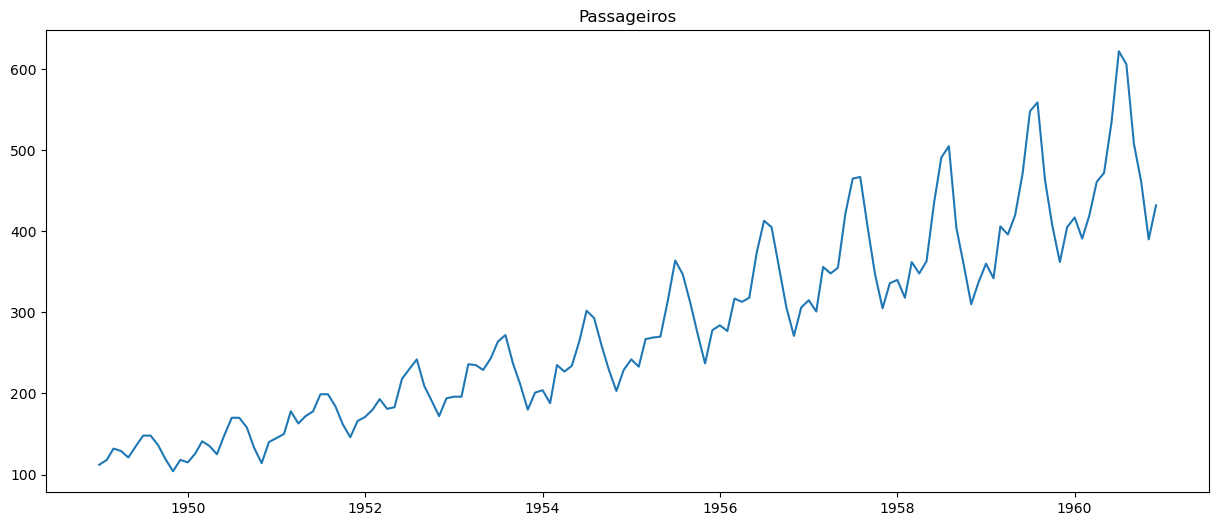

In [5]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 6


register_matplotlib_converters()  # sempre usar quando for imprimir datas no plot
plt.plot(airpass)
plt.title('Passageiros')
plt.show()

# Média Móvel

### Média móvel causa alguns efeitos em séries temporais:

- ### Suaviza a série
- ### Remove Outliers e picos de sazonalidade
- ### Expõe a tendência da série (super útil em longas séries diárias)

 **O cálculo da média móvel consiste em calcular a média de um determinado número de pontos consecutivos em uma série temporal, deslizando essa janela ao longo da série.**

$$\text{Média Móvel}_t = \frac{1}{n} \sum_{i=0}^{n-1} X_{t-i}$$




- $n$ é o número de períodos considerados para calcular a média móvel; </br>
- $X_{t-i}$ representa o valor da série temporal no tempo $t-i$;</br>
- $\sum_{i=0}^{n-1}$ acumula os valores dos últimos $n$ períodos.</br>

</br>
Antes, definimos a quantidade de períodos para o cálculo</br>
Por exemplo suponhamos que temos a tabela:

|Data|Valor|
|:--:|:--:|
|Janeiro|10|
|Fevereiro|5|
|Março|8|
|Abril|12|
|Maio|7| 

Suponhamos que hoje seja Maio e queremos a média móvel de 3 períodos, seria algo assim:

|Data|Valor|Cálculo|Média Móvel|
|:--:|:--:|:--:|:--:|
|Janeiro|10|(10 + NaN + NaN) /3|NaN|
|Fevereiro|5|(5 + 10 + NaN) /3|NaN|
|Março|8|(8 + 5 + 10) /3|7,66|
|Abril|12|(12 + 8 + 5) /3|8,33|
|Maio|7|(7 + 12 + 8) /3|9|

***Nota-se que quando calculamos a média móvel, quando o cálculo possuí algum período sem valor o valor retornado é NaN, você notará que alguns meses ou anos ou até dias se perdem. Sempre use .fittedvalues do python para corrigir valores NaN's***

In [6]:
p = airpass[['#Passengers']]

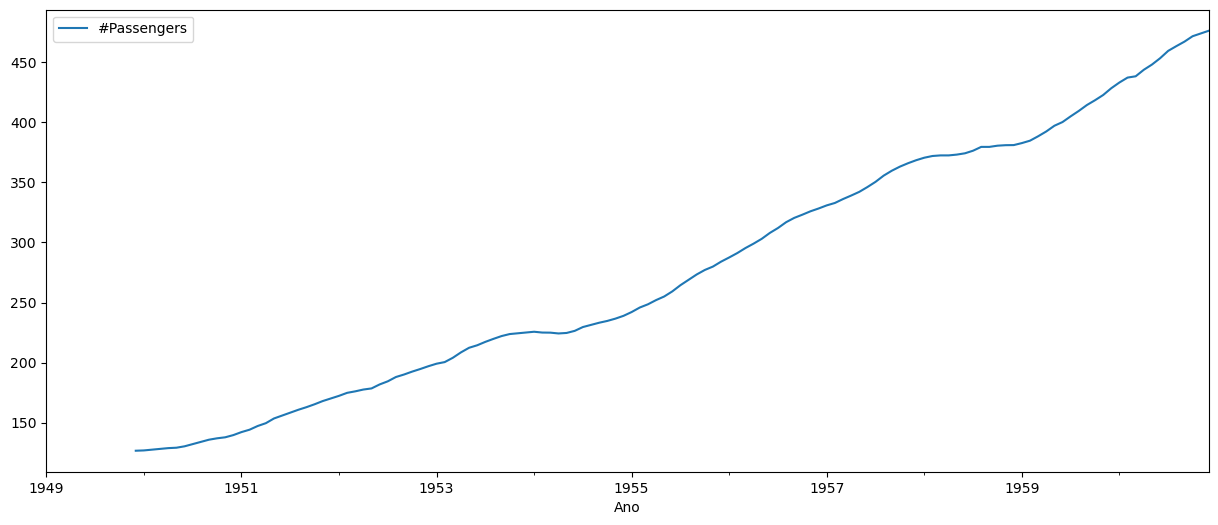

In [7]:
# serie.rolling(ordem).mean() -> média movel de ordem - ordem
p.rolling(12).mean().plot()
plt.xlabel('Ano')
plt.show()

# Decomposição

### Decomposição é o método de separar os componentes da série temporal
 
#### Dentre motivos para isso temos:

- Indentificar Sazonalidade, Ciclos e Ruídos (Erros)
- Melhorar modelagens de Forecasting -> podemos aplicar modelos apenas a parte sazonal ou tendencia (depende do seu negócio)
- Auxilia na leitura das estruturas dos seus dados
- Identifica padrões

#### Há dois métodos de decomposição:

|Método|Quando usar|Fórmula|
|:--:|:--:|:--:|
|Aditivo|Se a variação sazonal e o ruído parecem constantes ao longo do tempo, um modelo aditivo pode ser mais apropriado.|$Y_t = T_t + S_t + E_t$|
|Multiplicativo|Se a amplitude da sazonalidade ou o ruído aumenta com o nível da série temporal, considere o modelo multiplicativo.|$Y_t = T_t \times S_t \times E_t$|

#### Aditivo - acredita-se que o nível da sazonalidade de mantém ao longo do período

- $Y_t$ é o valor observado da série temporal no tempo $t$;
- $T_t$ é o componente de tendência;
- $S_t$ é o componente sazonal;
- $E_t$ é o componente de erro ou ruído.
- 
#### Multiplicativo - Acredita-se que a sazonalidade aumenta seu nível ao longo do período

- $Y_t$ é o valor observado da série temporal no tempo $t$;
- $T_t$ é o componente de tendência;
- $S_t$ é o componente sazonal;
- $E_t$ é o componente de erro ou ruído.

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [12]:
def dateparse(dates): return datetime.strptime(dates, '%Y-%m')


data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_26168\1076521016.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


In [13]:
result = seasonal_decompose(data, model='multiplicative')

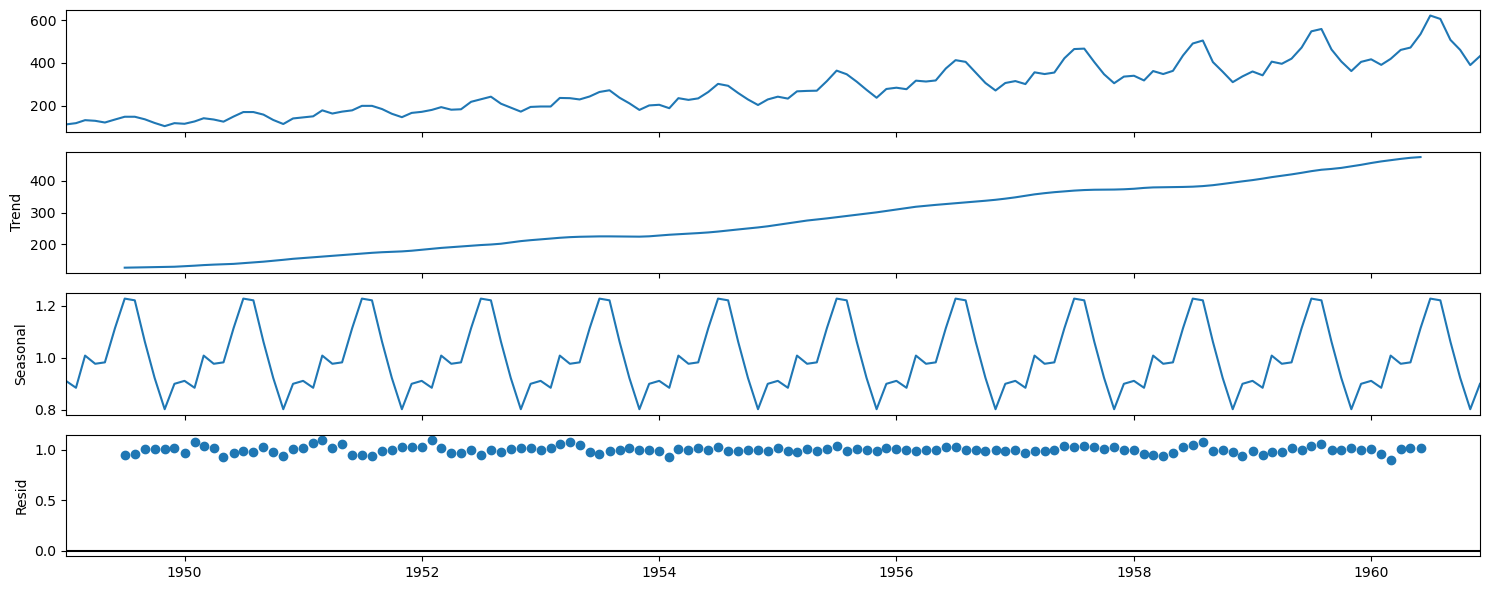

In [14]:
result.plot()
plt.show()

In [15]:
result2 = seasonal_decompose(data, model='aditive')

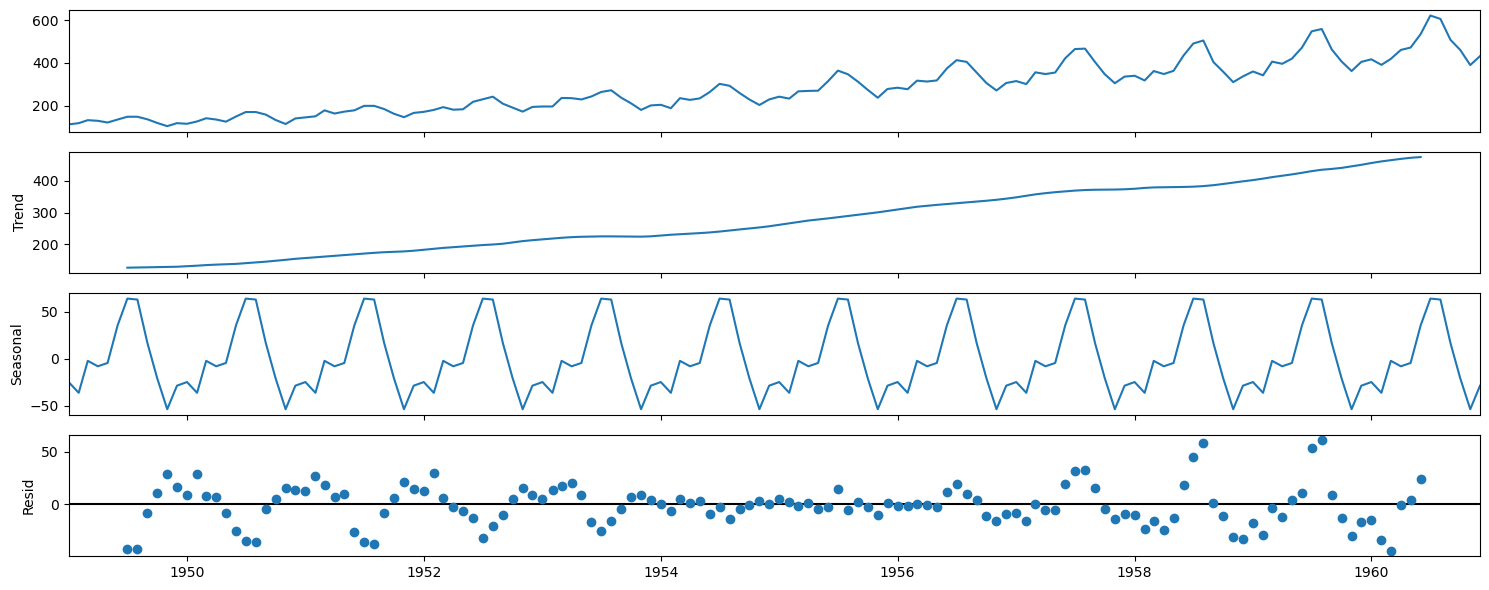

In [16]:
result2.plot()
plt.show()

# Teste de estacionariedade

## **Séries Estacionárias**

Séries estacionárias são séries que mantém uma mesma média e variância ao longo dos dados

Normalmente séries com Tendência e Sazonalidade não são estacionárias. Mas com apenas sazonalidade pode haver

Podemos transformar séries em séries estacionárias aplicando transformações $log()$, Diferenciação ou $Log$-Diferenciação como iremos ver

Teste Adfuller para Séries estacionárias, caso p_value > 0.05, não temos estacionariedade

In [17]:
from statsmodels.tsa.stattools import adfuller

X = data['#Passengers']
result = adfuller(X)
print(result)

# P-value > 0.05 -> não é estacionária

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


### Tornando uma série estacionária com Log - alguns modelos pressupõem que os dados são estacionários

-> log não se pode aplicar uma vez atrás da outra

In [18]:
import numpy as np
d_log = np.log(data)

In [19]:
adfuller(d_log)

(-1.717017089106965,
 0.422366774770389,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

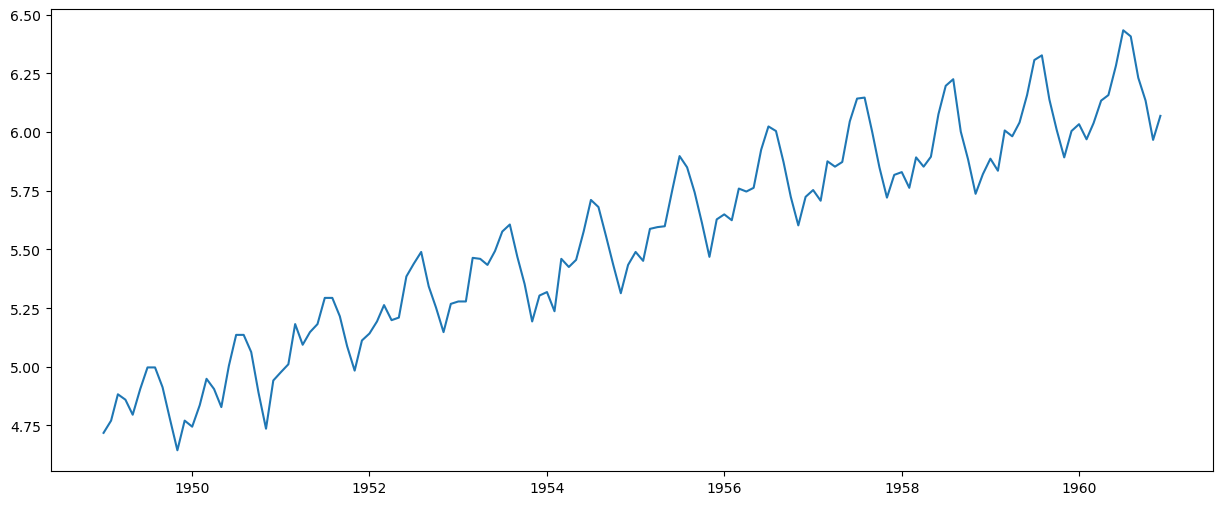

In [20]:
plt.plot(d_log)

### Diferenciação para transformar dados em série estacionárias

Diferenciação pode-se ser aplicada em escala

In [21]:
def dateparse(dates): return datetime.strptime(dates, '%Y-%m')


data = pd.read_csv('AirPassengers.csv', parse_dates=[
                   'Month'], index_col='Month', date_parser=dateparse)

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_26168\1076521016.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=[


In [22]:
def adf_test(y):
    print('Resultado do teste: ')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Teste', 'Valor p', '# de lags', "# de observações"])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)

In [23]:
y = data['#Passengers']

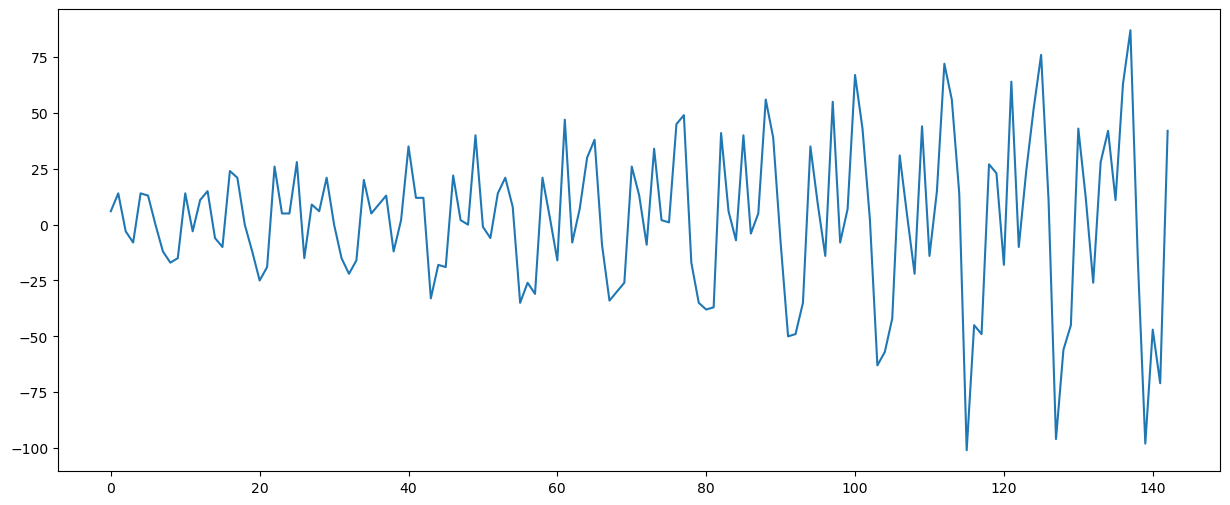

In [24]:
y_diff = np.diff(y)

plt.plot(y_diff)

In [25]:
adf_test(y_diff)

Resultado do teste: 
Teste                      -2.829267
Valor p                     0.054213
# de lags                  12.000000
# de observações          130.000000
Valores Críticos (1%)      -3.481682
Valores Críticos (5%)      -2.884042
Valores Críticos (10%)     -2.578770
dtype: float64


In [26]:
y_diff2 = np.diff(y_diff)
adf_test(y_diff2)

Resultado do teste: 
Teste                    -1.638423e+01
Valor p                   2.732892e-29
# de lags                 1.100000e+01
# de observações          1.300000e+02
Valores Críticos (1%)    -3.481682e+00
Valores Críticos (5%)    -2.884042e+00
Valores Críticos (10%)   -2.578770e+00
dtype: float64


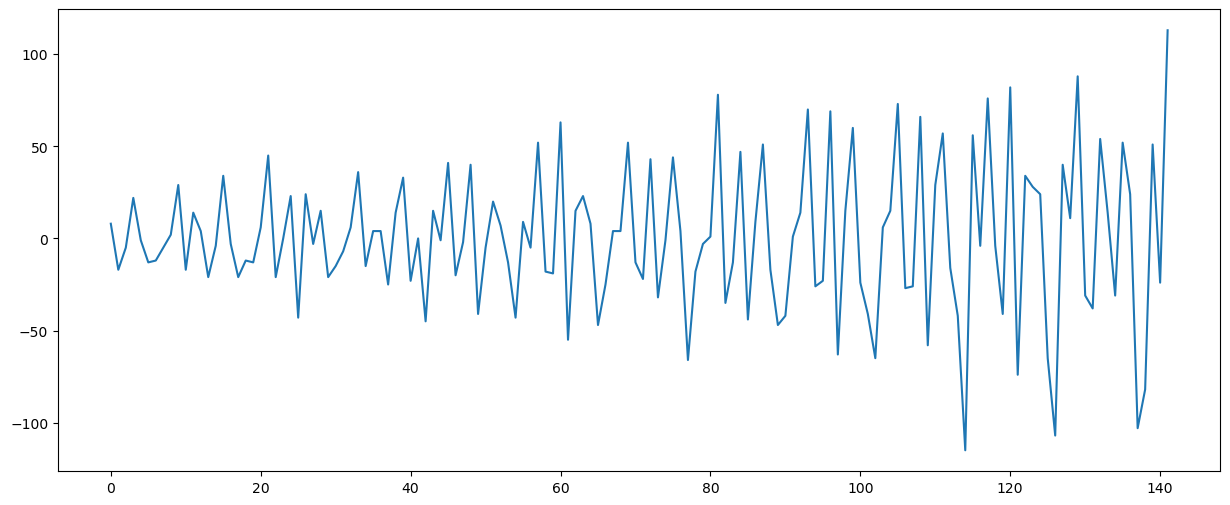

In [27]:
plt.plot(y_diff2)

### Técnica Diferenciação com Log

Nessa técnica fazemos o log e com os dados log usamos a média móvel (que também remove um pouco a tendência e sazonalidade -> e isso torna a série estacionária) e subtraímos esse valor com o valor de log

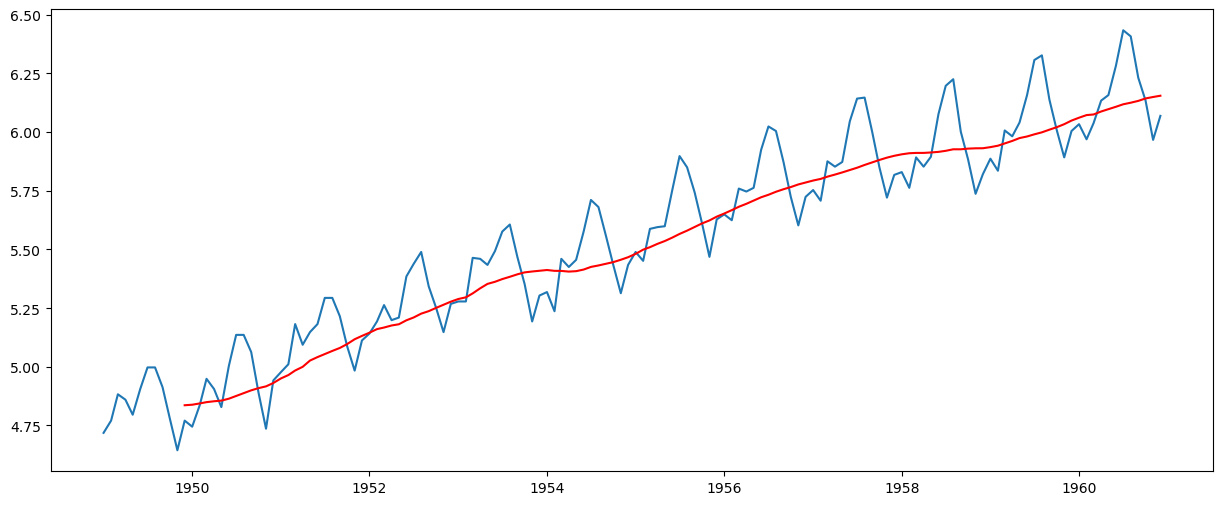

In [28]:
log_data = np.log(data)
movel_data = log_data.rolling(12).mean()
plt.plot(log_data)
plt.plot(movel_data, color='r')

In [29]:
# agora subtraímos

data_log_menos_movel = log_data - movel_data

# vão ser gerados valores NaN, precisamos removê-los

data_log_menos_movel.dropna(inplace=True)

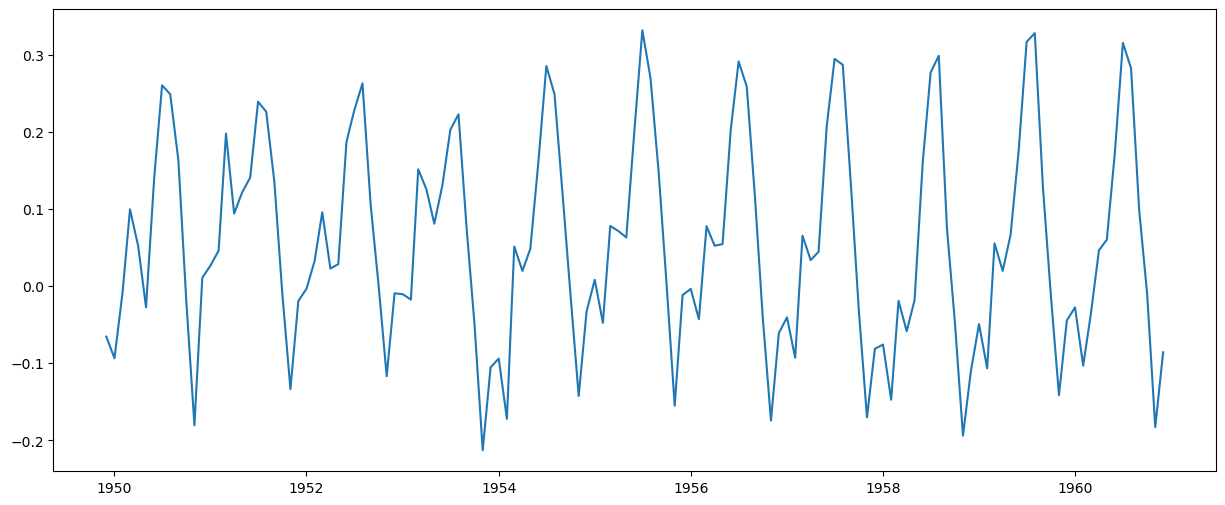

In [30]:
plt.plot(data_log_menos_movel)

In [31]:
adf_test(data_log_menos_movel)

Resultado do teste: 
Teste                      -3.162908
Valor p                     0.022235
# de lags                  13.000000
# de observações          119.000000
Valores Críticos (1%)      -3.486535
Valores Críticos (5%)      -2.886151
Valores Críticos (10%)     -2.579896
dtype: float64


# Removendo tendência com Regressão


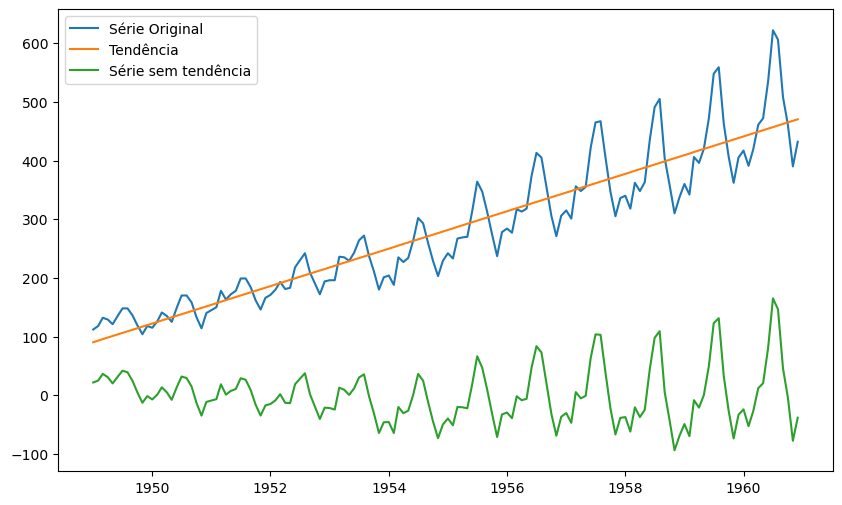

In [32]:
from sklearn.linear_model import LinearRegression

x = np.array(range(len(data))).reshape(-1, 1)
y = data.values

model = LinearRegression()
model.fit(x, y)

# vai construir uma reta de melhor ajustes de TENDE a seguir a tendência
trend = model.predict(x)
detrended = y - trend

plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Série Original')
plt.plot(data.index, trend, label='Tendência')
plt.plot(data.index, detrended, label='Série sem tendência')
plt.legend()
plt.show()

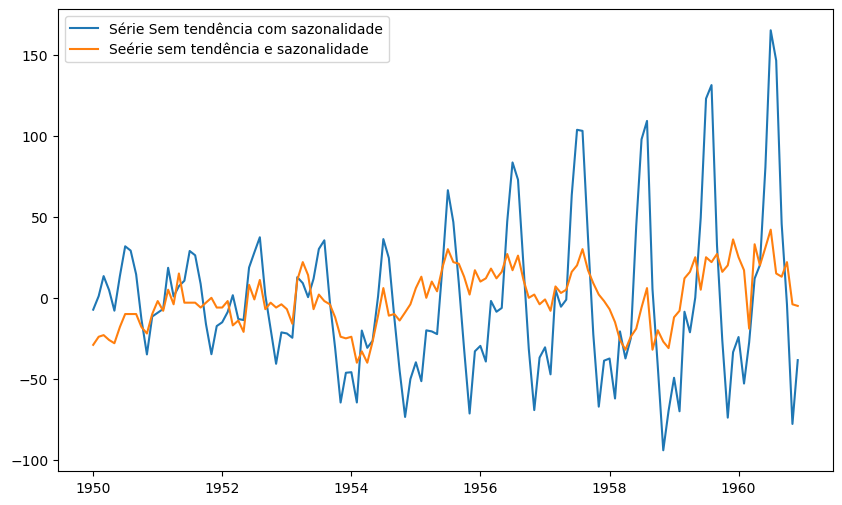

In [33]:
# Remvocendo a sazonalidade
seasonal_diff = detrended[12:] - detrended[:-12]

plt.figure(figsize=(10, 6))
plt.plot(data.index[12:], detrended[12:],
         label='Série Sem tendência com sazonalidade')
plt.plot(data.index[12:], seasonal_diff,
         label='Seérie sem tendência e sazonalidade')
plt.legend()
plt.show()